# TFM: 
## Degradación de un sistema fotovoltáico 
## Luis Julián García Giménez

Salida: Histogramas de cada una de las variables. Media, mediana, máximo, mínimo. Gráficas para días concretos con power, Tcell, poa en la misma gráfica (incluir un día concreto en la memoria). En estas gráficas usar maxminscaler de sklearn

In [46]:
'''
Hacer las correlaciones para ver como dependen unas columnas de otras.

Para un dia concreto mostrar power, poa y Tcell en una misma gráfica para ver que existe una correspondencia.
El poa es casi equivalente al power
Esta gráfica debe ser normalizada (Sobre 1) utilizando MaxMinScaler.
La temperatura es más problemática. La temperatura no se asemeja tanto a la potencia porque tarda más en cambiar (Creemos)
La radación sin embargo si que se detecta de manera más rápida. 
El cambio de radiación es un cambio más drastico que el cambio de temperatura, el cual es más paulatino.
Por lo tanto la temperatura no es tan fiable para predecir la potencia ya que no detecta el cambio instantaneo.


(En la gráfica que me muestra Rafa en el documento ha cogido poa y Tcell tal cual, no ha hecho la media)

'''

'\nHacer las correlaciones para ver como dependen unas columnas de otras.\n\nPara un dia concreto mostrar power, poa y Tcell en una misma gráfica para ver que existe una correspondencia.\nEl poa es casi equivalente al power\nEsta gráfica debe ser normalizada (Sobre 1) utilizando MaxMinScaler.\nLa temperatura es más problemática. La temperatura no se asemeja tanto a la potencia porque tarda más en cambiar (Creemos)\nLa radación sin embargo si que se detecta de manera más rápida. \nEl cambio de radiación es un cambio más drastico que el cambio de temperatura, el cual es más paulatino.\nPor lo tanto la temperatura no es tan fiable para predecir la potencia ya que no detecta el cambio instantaneo.\n\n\n(En la gráfica que me muestra Rafa en el documento ha cogido poa y Tcell tal cual, no ha hecho la media)\n\n'

In [47]:
import pandas as pd
import matplotlib.pyplot as plt


path_i='/Users/LuisGarcia/Desktop/TFM/interpolados_no_z_n_cc/'
path_ni='/Users/LuisGarcia/Desktop/TFM/no_interpolados_no_z_n_cc/'
path_ima='/Users/LuisGarcia/Desktop/TFM/imagenes_no_z_n_cc/preprocesado_1/'

df1_ni=pd.read_csv(path_ni + 'df1_ni.csv')
df2_ni=pd.read_csv(path_ni + 'df2_ni.csv')
df3_ni=pd.read_csv(path_ni + 'df3_ni.csv')
df4_ni=pd.read_csv(path_ni + 'df4_ni.csv')

df1_i=pd.read_csv(path_i + 'df1_i.csv')
df2_i=pd.read_csv(path_i + 'df2_i.csv')
df3_i=pd.read_csv(path_i + 'df3_i.csv')
df4_i=pd.read_csv(path_i + 'df4_i.csv')

#RENOMBRAR COLUMNAS
#media_poa --> poa
#media_temp --> Tcell
df1_ni = df1_ni.rename(columns = {"media_poa": "poa" , "media_temp": "Tcell"})
df2_ni = df2_ni.rename(columns = {"media_poa": "poa" , "media_temp": "Tcell"})
df3_ni = df3_ni.rename(columns = {"media_poa": "poa" , "media_temp": "Tcell"})
df4_ni = df4_ni.rename(columns = {"media_poa": "poa" , "media_temp": "Tcell"})

df1_i = df1_i.rename(columns = {"media_poa": "poa" , "media_temp": "Tcell"})
df2_i = df2_i.rename(columns = {"media_poa": "poa" , "media_temp": "Tcell"})
df3_i = df3_i.rename(columns = {"media_poa": "poa" , "media_temp": "Tcell"})
df4_i = df4_i.rename(columns = {"media_poa": "poa" , "media_temp": "Tcell"})

comprobacion_ni=df1_ni.isnull().values.any() #False=No hay ningún nulo / True=Hay algún nulo
comprobacion_i=df1_i.isnull().values.any()
print("Comprobación no interpolados: ", comprobacion_ni)
print("Comprobación interpolados: ", comprobacion_i)
print()

print("df1 INTERPOLADO")
print(df1_i)
print()

print("df1 NO INTERPOLADO")
print(df1_ni)
print()

print("ESTADISTICAS df1 INTERPOLADO")
print(df1_i.describe().apply(lambda s: s.apply('{0:.5f}'.format)))
print()

print("ESTADISTICAS df1 NO INTERPOLADO")
print(df1_ni.describe().apply(lambda s: s.apply('{0:.5f}'.format)))
print()

print("TAMAÑO INTERPOLADO: ", len(df1_i))
print("TAMAÑO NO INTERPOLADO: ", len(df1_ni))
print()

#ELIMINAR LA ÚLTIMA FILA DE LOS DATOS INTERPOLADOS (QUE CORRESPONDE CON 2021)
#YA QUE NO QUEREMOS QUE SE TOME COMO OTRO AÑO

# len(df1_i)-1 = 264456
print("TAMAÑO df4_i")
print(len(df4_i))

print("ÚLTIMA FILA df4_i")
print(df4_i["Timestamp"].iloc[-1])
print()

df1_i=df1_i.drop([264456], axis=0)
df2_i=df2_i.drop([264456], axis=0)
df3_i=df3_i.drop([264456], axis=0)

#SUCEDE ALGO EXTRAÑO CON LAS DIMENSIONES DE LOS DATOS INTERPOLADOS. 
#TIENE 264372 FILAS

df4_i=df4_i.drop([264371], axis=0)


print("df1_i")
print(df1_i)
print()

print("ÚLTIMA FILA DE LOS INTERPOLADOS DEBE SER EN 2020")
print(df1_i["Timestamp"].iloc[-1])
print()


print("AHORA EL TAMAÑO DE LOS INTERPOLADOS DEBERÍA HABER DISMINUIDO 1 FILA: ")

print("TAMAÑO INTERPOLADO: ", len(df1_i))
print("TAMAÑO NO INTERPOLADO: ", len(df1_ni))


Comprobación no interpolados:  False
Comprobación interpolados:  False

df1 INTERPOLADO
                  Timestamp     power  poa  Tcell
0       2013-01-01 00:00:00   39.5549  0.0   2.10
1       2013-01-01 00:15:00   39.5549  0.0   1.86
2       2013-01-01 00:30:00   39.5549  0.0   2.18
3       2013-01-01 00:45:00   39.5549  0.0   3.11
4       2013-01-01 01:00:00   39.5549  0.0   3.10
...                     ...       ...  ...    ...
264452  2020-12-31 23:00:00  518.7540  0.0   1.75
264453  2020-12-31 23:15:00  518.7540  0.0   2.76
264454  2020-12-31 23:30:00  518.7540  0.0   3.17
264455  2020-12-31 23:45:00  518.7540  0.0   3.16
264456  2021-01-01 00:00:00  518.7540  0.0   2.61

[264457 rows x 4 columns]

df1 NO INTERPOLADO
                  Timestamp       power     poa  Tcell
0       2013-01-01 08:00:00     39.5549    6.02   1.87
1       2013-01-01 08:15:00   1211.6331   32.03   2.40
2       2013-01-01 08:30:00   5973.3571   53.33   3.20
3       2013-01-01 08:45:00  11922.0651   88.

DATOS INTERPOLADOS
df1_i
Mediana power:  10141.323550000001
Mediana poa:  32.135000000000005
Mediana Tcell:  17.93
--------------------------
df2_i
Mediana power:  7255.76145
Mediana poa:  29.86
Mediana Tcell:  17.88
--------------------------
df3_i
Mediana power:  7565.8309
Mediana poa:  31.64
Mediana Tcell:  17.93
--------------------------
df4_i
Mediana power:  6712.32
Mediana poa:  31.52
Mediana Tcell:  17.929676068752755
--------------------------
----------------------------------------

DATOS NO INTERPOLADOS
df1_ni
Mediana power:  64763.2191
Mediana poa:  362.53
Mediana Tcell:  28.21
--------------------------
df2_ni
Mediana power:  69495.6591
Mediana poa:  354.44
Mediana Tcell:  28.24
--------------------------
df3_ni
Mediana power:  70962.1971
Mediana poa:  359.31
Mediana Tcell:  28.39
--------------------------
df4_ni
Mediana power:  67191.66900000001
Mediana poa:  361.5
Mediana Tcell:  28.43
--------------------------
----------------------------------------



<ipython-input-73-a4ddf890d25c>:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(10,4))


COMPARATIVA NO INTERPOLADO VS INTERPOLADO


<ipython-input-73-a4ddf890d25c>:123: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(10,4))
<ipython-input-73-a4ddf890d25c>:123: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(10,4))
<ipython-input-73-a4ddf890d25c>:123: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


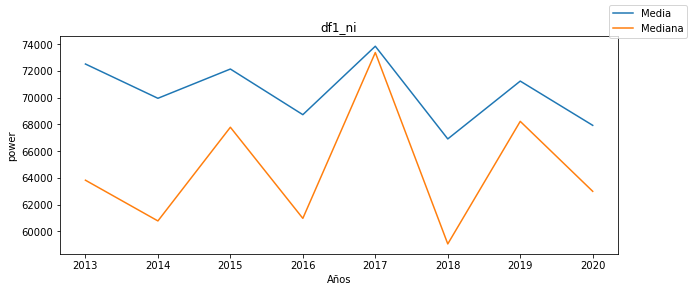

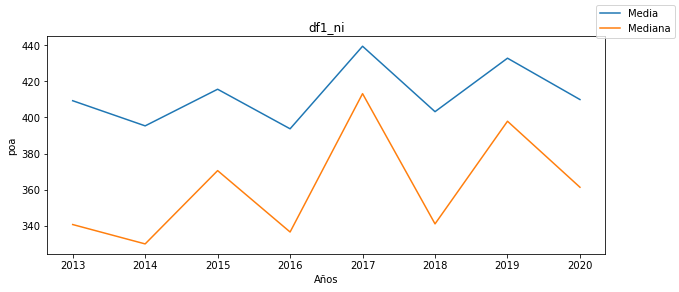

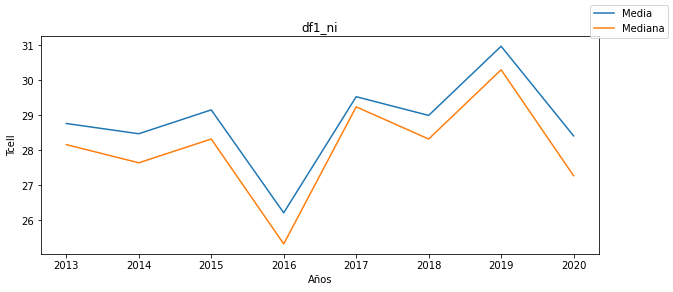

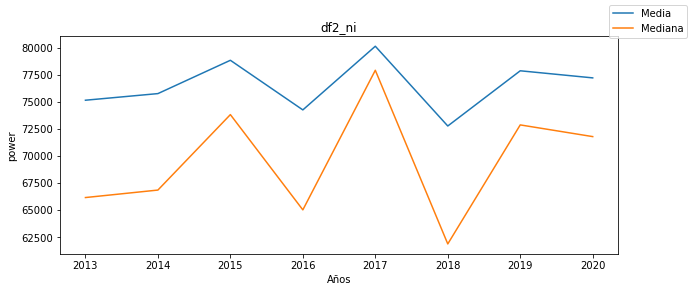

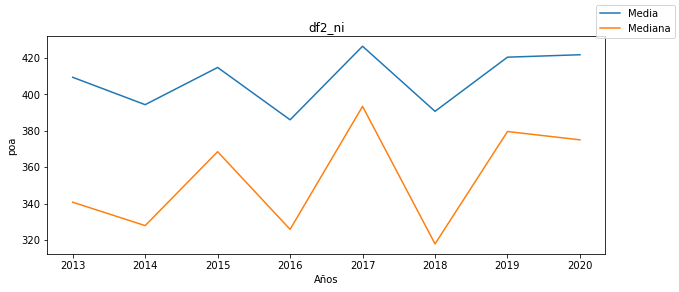

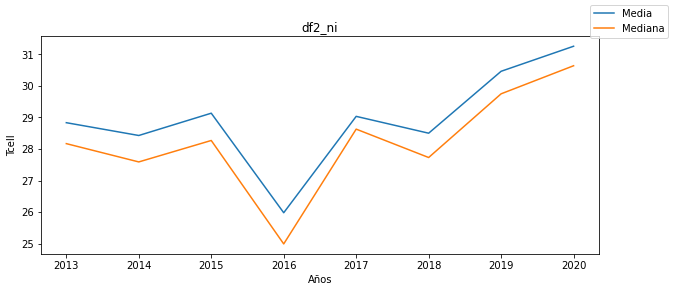

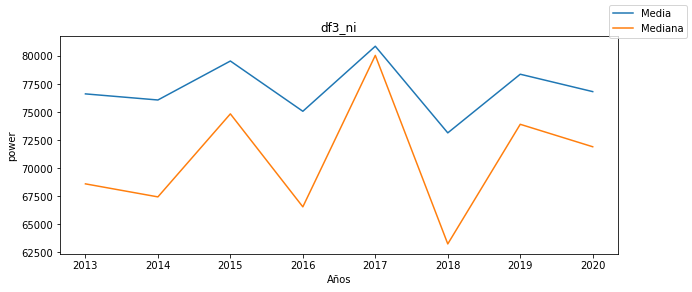

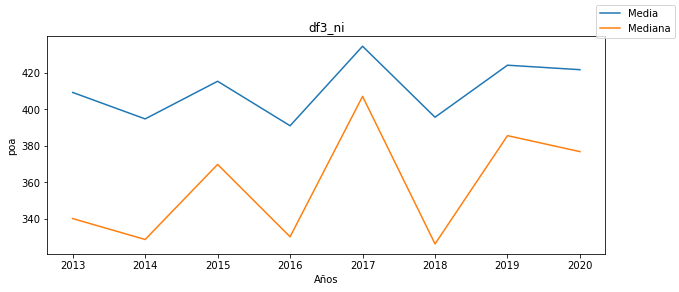

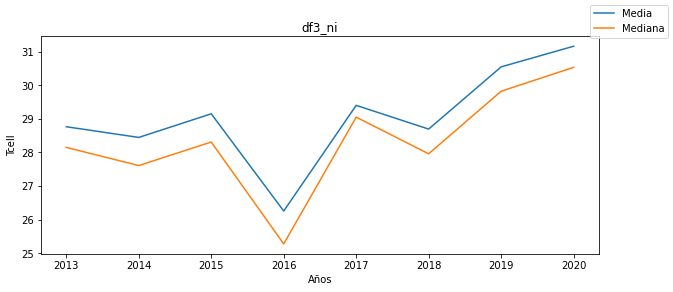

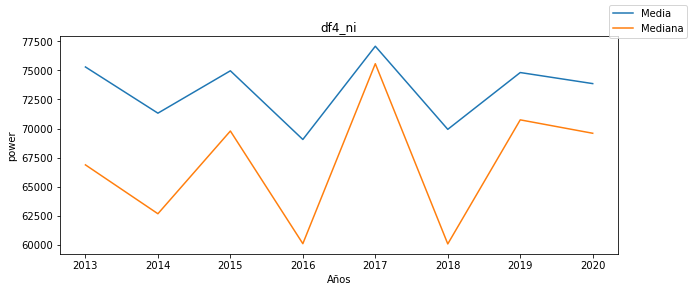

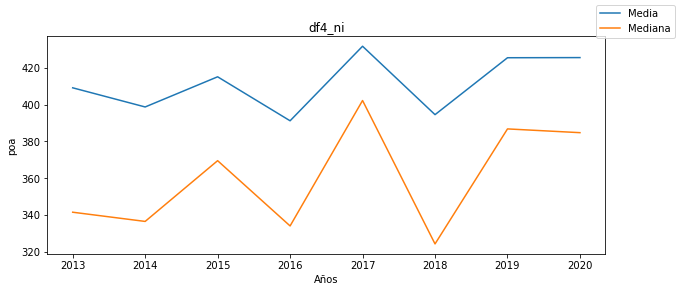

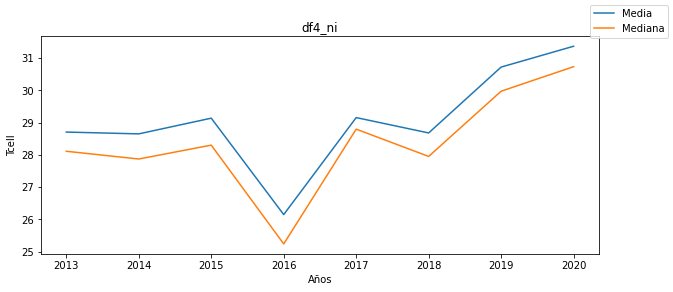

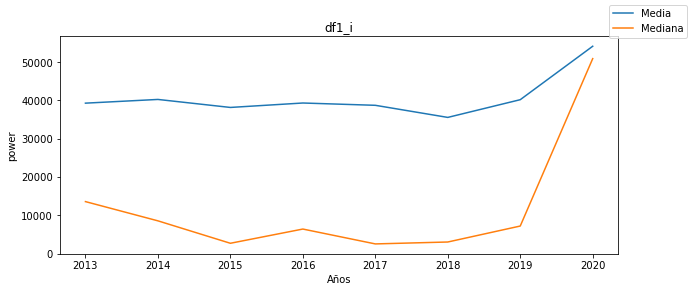

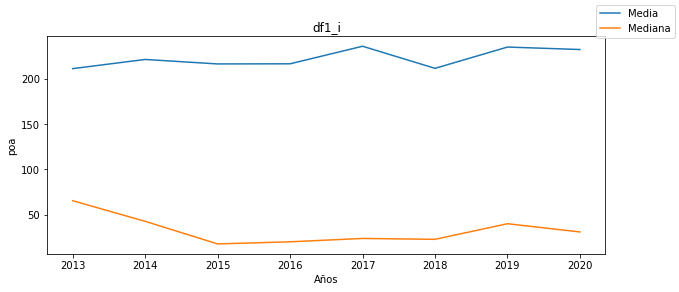

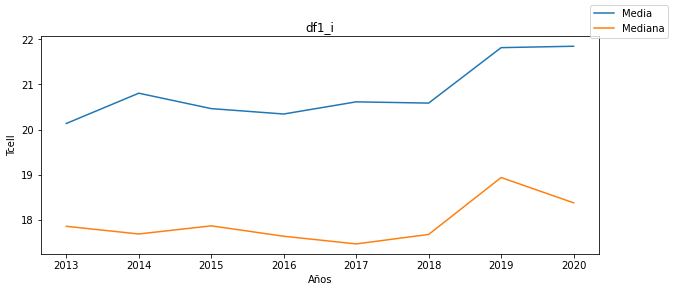

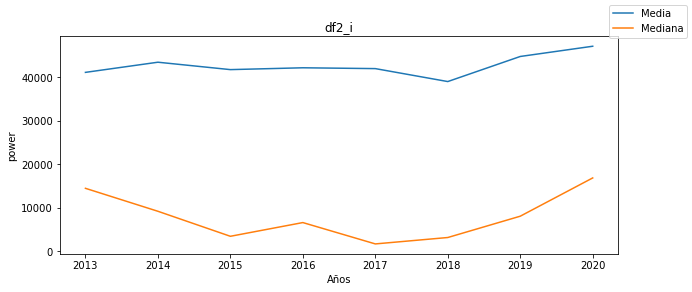

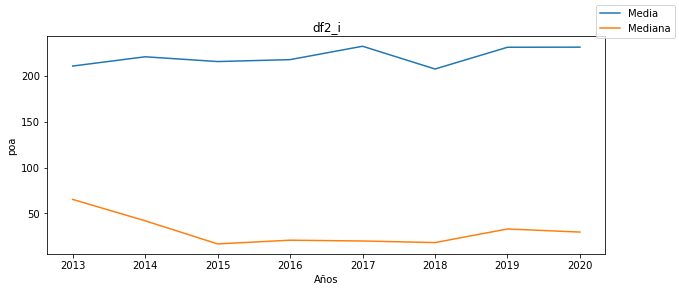

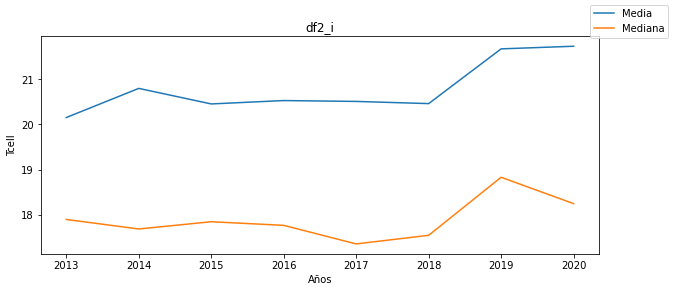

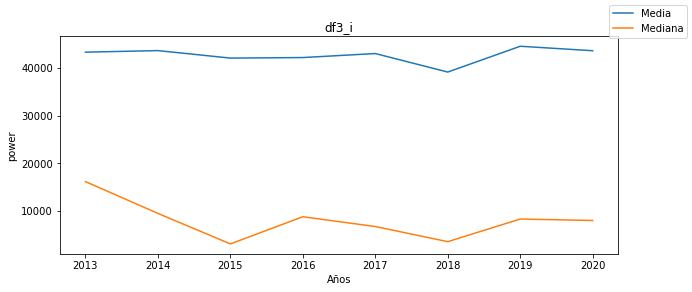

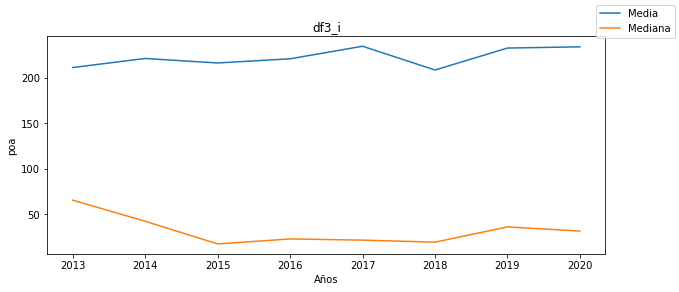

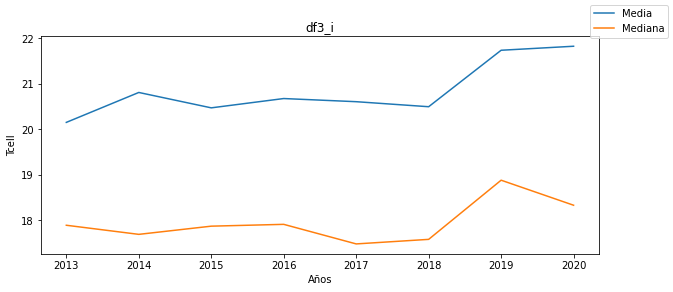

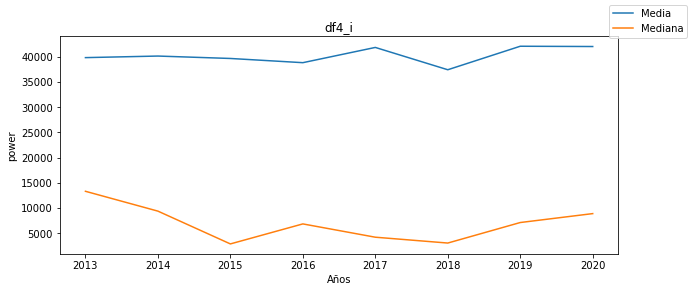

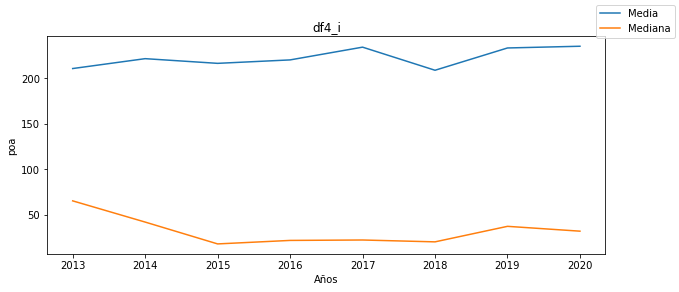

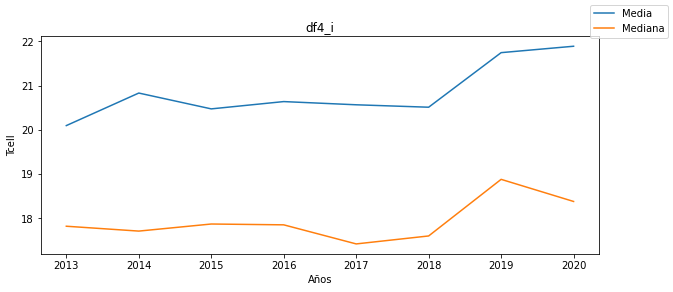

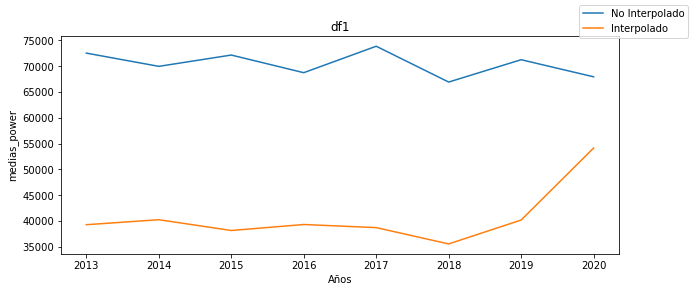

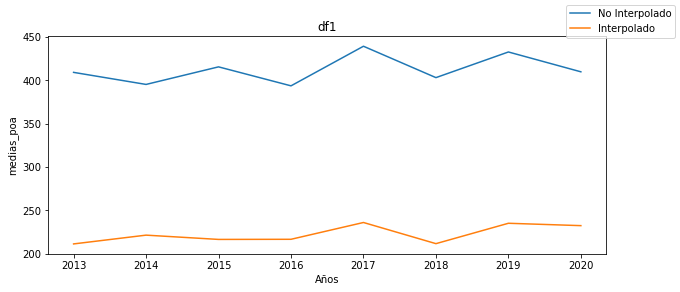

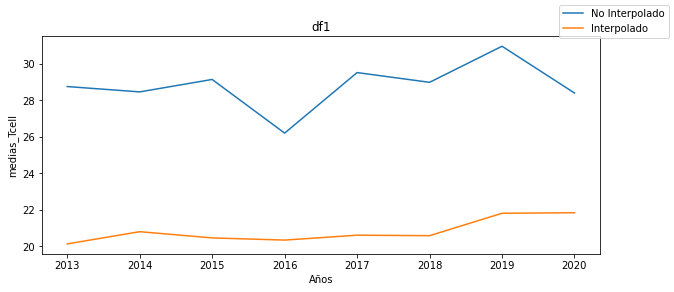

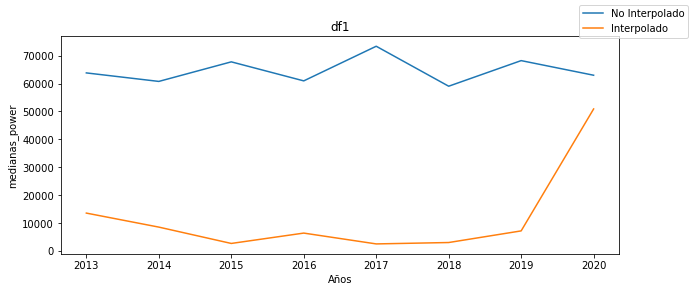

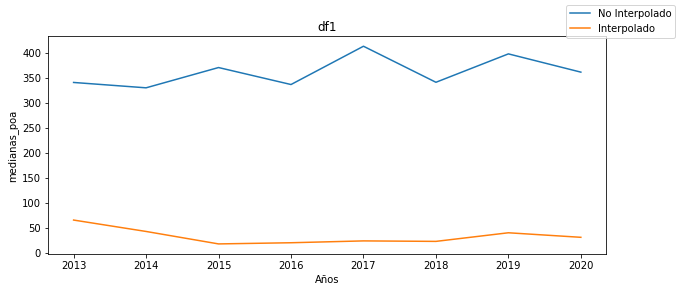

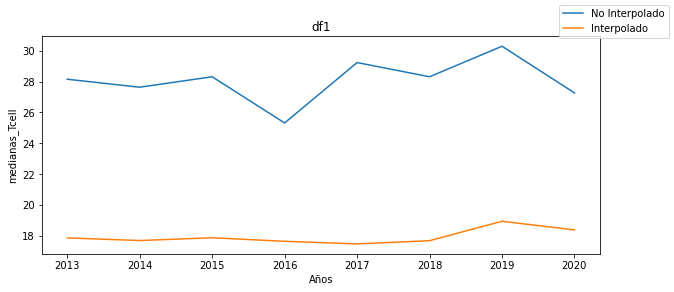

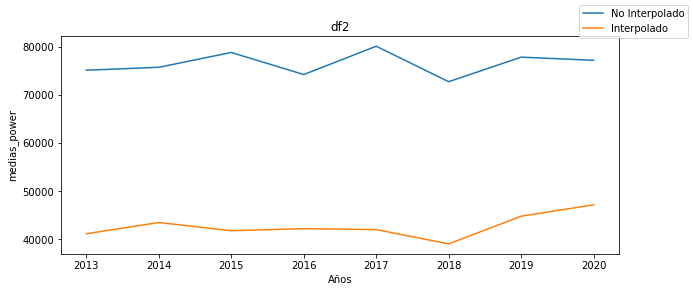

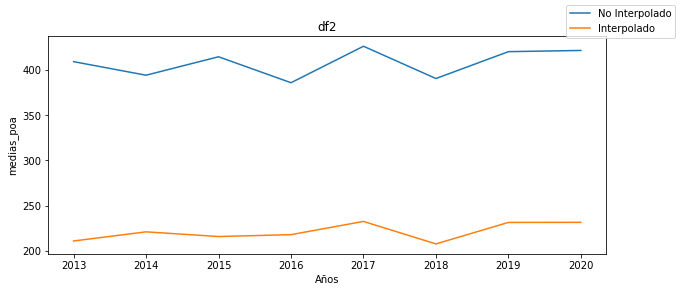

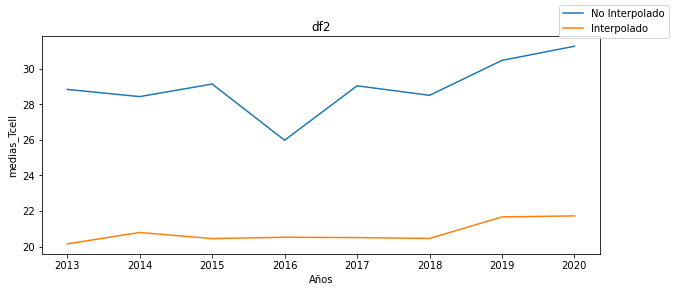

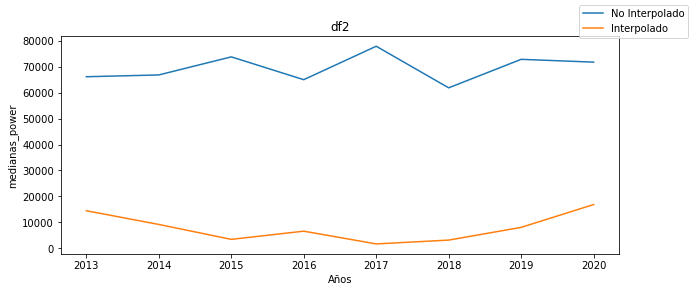

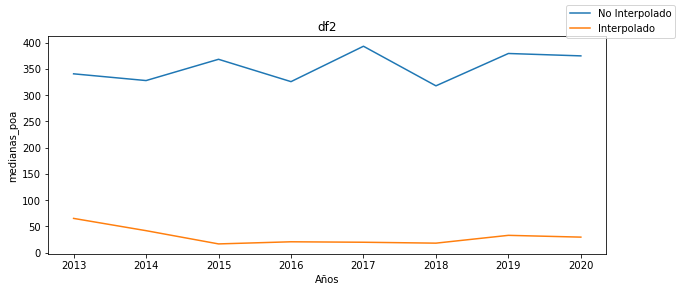

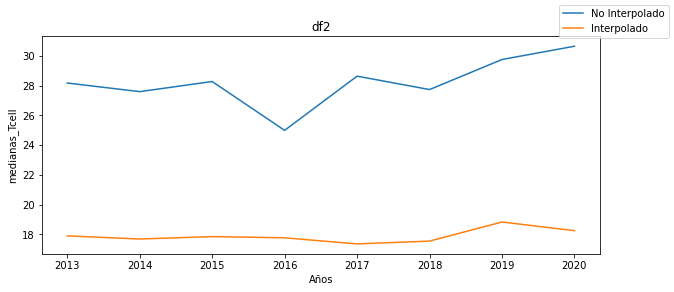

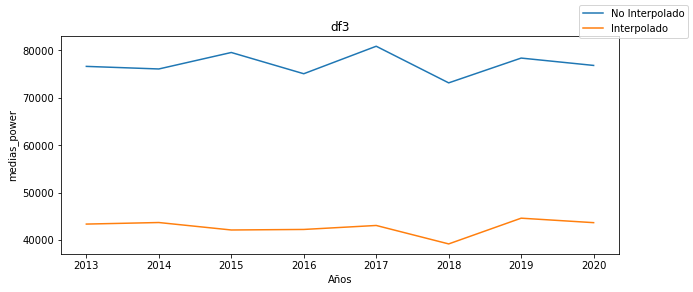

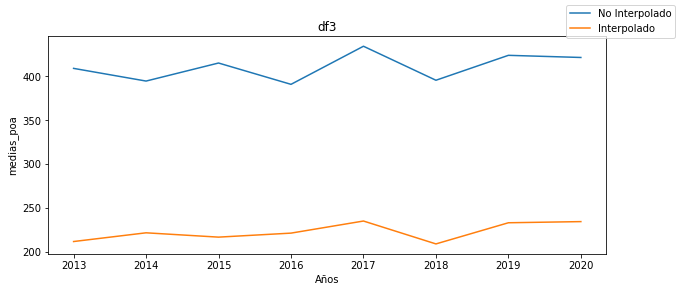

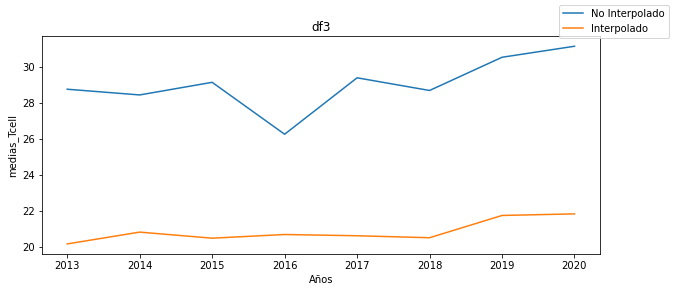

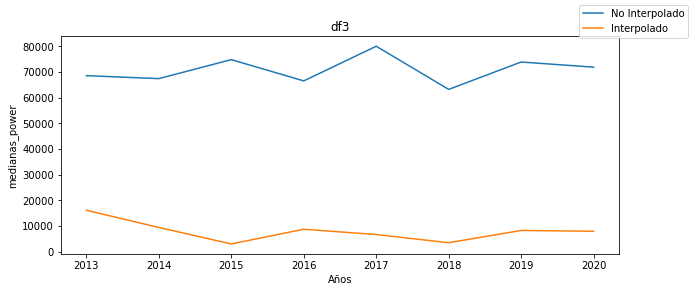

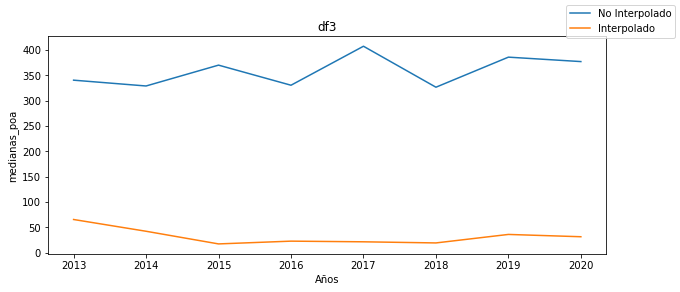

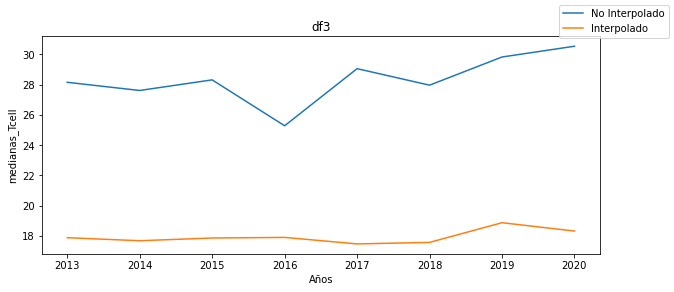

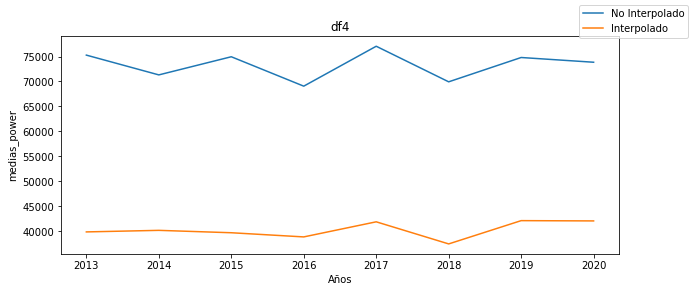

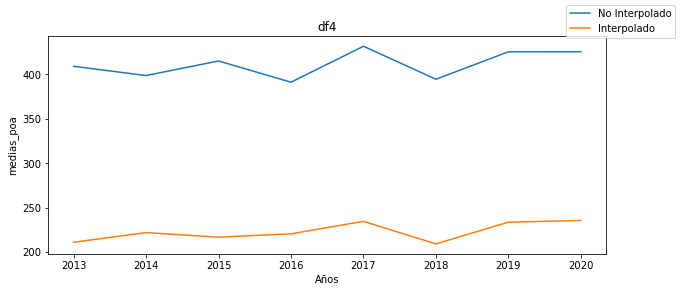

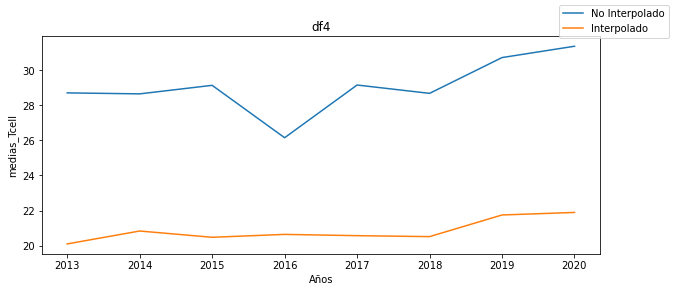

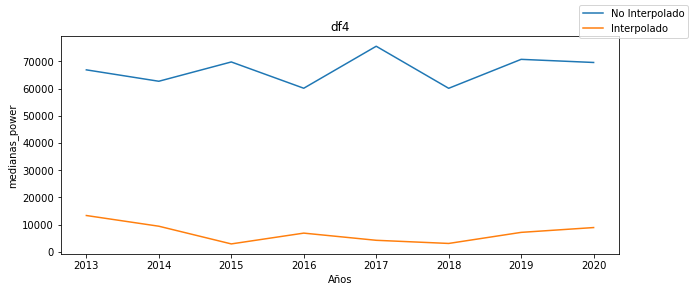

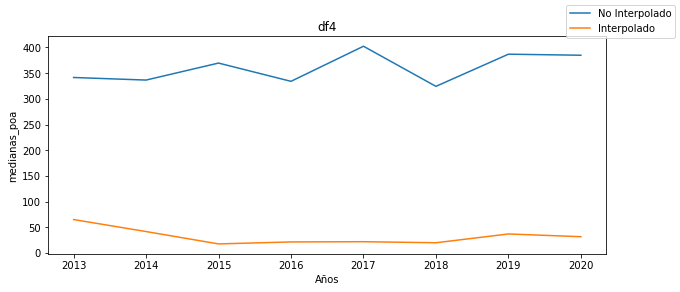

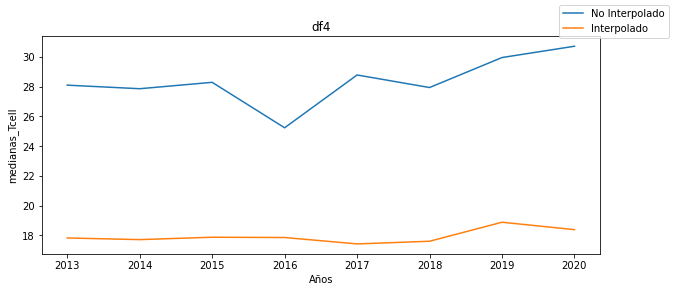

In [73]:
def analizar_mediana(df,df_str):

    mediana_power=df.power.median()
    mediana_poa=df.poa.median()
    mediana_Tcell=df.Tcell.median()
    
    print(df_str)
    print("Mediana power: ", mediana_power)
    print("Mediana poa: ", mediana_poa)
    print("Mediana Tcell: ", mediana_Tcell)
    print("--------------------------")


def representar_graficas(x, media, mediana, variable, df_str):
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(x,media, label ="Media")
    ax.plot(x,mediana, label ="Mediana")
    ax.set_xlabel('Años')
    ax.set_ylabel(variable)
    ax.title.set_text(df_str)
    fig.legend(loc = 'upper right')
    
    nombre_img="representar_graficas_" + variable + "_" + df_str + ".png"
    plt.savefig(path_ima + nombre_img)




def analizar_año(df, df_str):
    
    años=['2013', '2014','2015', '2016', '2017', '2018', '2019', '2020']
    medias_power=[]
    medias_poa=[]
    medias_Tcell=[]
    medianas_power=[]
    medianas_poa=[]
    medianas_Tcell=[]

    for i in años:
        fecha_inicio= i + '-01-01'
        fecha_fin= i + '-12-31'
        mask = (df.Timestamp > fecha_inicio) & (df.Timestamp <= fecha_fin)
        
        media_power=df['power'].loc[mask].mean()
        media_poa=df['poa'].loc[mask].mean()
        media_Tcell=df['Tcell'].loc[mask].mean()
        
        mediana_power=df['power'].loc[mask].median()
        mediana_poa=df['poa'].loc[mask].median()
        mediana_Tcell=df['Tcell'].loc[mask].median()
        
        
        medias_power.append(media_power)
        medias_poa.append(media_poa)
        medias_Tcell.append(media_Tcell)
        
        medianas_power.append(mediana_power)
        medianas_poa.append(mediana_poa)
        medianas_Tcell.append(mediana_Tcell)
        
        
        
    representar_graficas(años, medias_power, medianas_power, "power", df_str)
    representar_graficas(años, medias_poa, medianas_poa, "poa", df_str)
    representar_graficas(años, medias_Tcell, medianas_Tcell, "Tcell", df_str)
    
    
    #creamos df
    df_estadistico= pd.DataFrame({'años': años, 'medias_power':medias_power, 'medias_poa':medias_poa, 'medias_Tcell':medias_Tcell, 'medianas_power':medianas_power, 'medianas_poa':medianas_poa, 'medianas_Tcell':medianas_Tcell}) 
    
    '''
    print()
    print("df_estadistico")
    print(df_estadistico)
    print()
    '''
    
    return df_estadistico


print("DATOS INTERPOLADOS")
analizar_mediana(df1_i, "df1_i")
analizar_mediana(df2_i, "df2_i")  
analizar_mediana(df3_i, "df3_i")  
analizar_mediana(df4_i, "df4_i")  
print("----------------------------------------")
print()


print("DATOS NO INTERPOLADOS")
analizar_mediana(df1_ni, "df1_ni")
analizar_mediana(df2_ni, "df2_ni")  
analizar_mediana(df3_ni, "df3_ni")  
analizar_mediana(df4_ni, "df4_ni")  
print("----------------------------------------")
print()

#----------------------------------

#DATOS NO INTERPOLADOS
df1_ni_e=analizar_año(df1_ni, "df1_ni")
df2_ni_e=analizar_año(df2_ni, "df2_ni")
df3_ni_e=analizar_año(df3_ni, "df3_ni")
df4_ni_e=analizar_año(df4_ni, "df4_ni")

#DATOS INTERPOLADOS
df1_i_e=analizar_año(df1_i, "df1_i")
df2_i_e=analizar_año(df2_i, "df2_i")
df3_i_e=analizar_año(df3_i, "df3_i")
df4_i_e=analizar_año(df4_i, "df4_i")

#----------------------------------

def comparativa_i_ni(df_ni, df_i, df_str):
    columnas=len(df_ni.columns)
    nombres_columnas = df_ni.columns.values
    for i in range(1,columnas):
        columna_ni=df_ni.iloc[:,i]
        columna_i=df_i.iloc[:,i]
        columna_años=df_ni.iloc[:,0]
        variable= nombres_columnas[i]
        
        fig, ax = plt.subplots(figsize=(10,4))
        ax.plot(columna_años,columna_ni, label ="No Interpolado")
        ax.plot(columna_años,columna_i, label ="Interpolado")
        ax.set_xlabel('Años')
        ax.set_ylabel(variable)
        ax.title.set_text(df_str)
        fig.legend(loc = 'upper right')
        
        nombre_img="comparativa_i_ni_" + variable + "_" + df_str + ".png"
        plt.savefig(path_ima + nombre_img)

print("COMPARATIVA NO INTERPOLADO VS INTERPOLADO")
comparativa_i_ni(df1_ni_e,df1_i_e, "df1")
comparativa_i_ni(df2_ni_e,df2_i_e, "df2")
comparativa_i_ni(df3_ni_e,df3_i_e, "df3")
comparativa_i_ni(df4_ni_e,df4_i_e, "df4")

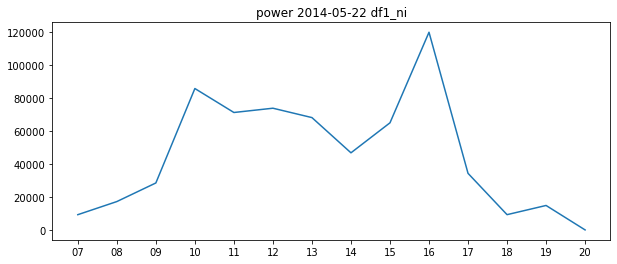

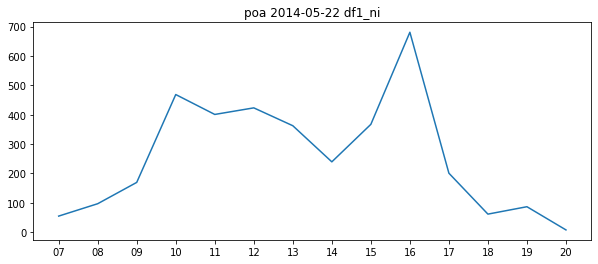

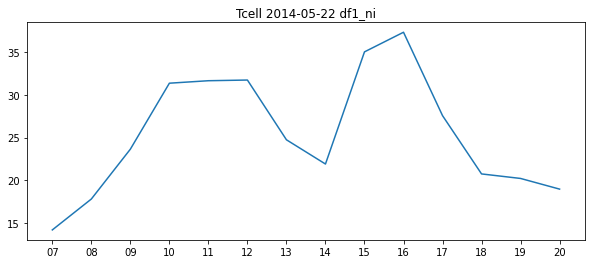

In [49]:
def plotear_dia_h(df, variable, dia, df_str):
    df_otro = pd.DataFrame()
    
    df_otro['Timestamp'] = pd.to_datetime(df.Timestamp)
    df_otro["Año"] = df_otro["Timestamp"].dt.strftime("%Y")
    df_otro["Dia"] = df_otro["Timestamp"].dt.strftime("%Y-%m-%d")
    df_otro["Hora"] = df_otro["Timestamp"].dt.strftime("%H")
    df_otro["Min_sec"] = df_otro["Timestamp"].dt.strftime("%M:%S")

    mask_dia = (df_otro.Dia == dia) & (df_otro.Min_sec == '00:00')
    variable_dia=df[variable].loc[mask_dia]
    time_dia=df_otro['Hora'].loc[mask_dia]
    
    #print(time_dia)
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(time_dia, variable_dia)
    ax.title.set_text(variable + " " + dia + " " + df_str)
    
    
    nombre_img="plotear_dia_h_" + dia + ".png"
    plt.savefig(path_ima + nombre_img)

plotear_dia_h(df1_ni, "power", '2014-05-22', 'df1_ni')
plotear_dia_h(df1_ni, "poa", '2014-05-22', 'df1_ni')
plotear_dia_h(df1_ni, "Tcell", '2014-05-22', 'df1_ni')

                  Timestamp       power     poa  Tcell
0       2013-01-01 08:00:00     39.5549    6.02   1.87
1       2013-01-01 08:15:00   1211.6331   32.03   2.40
2       2013-01-01 08:30:00   5973.3571   53.33   3.20
3       2013-01-01 08:45:00  11922.0651   88.55   3.16
4       2013-01-01 09:00:00  30104.7989  229.69   6.77
...                     ...         ...     ...    ...
112174  2020-12-31 15:45:00  35152.3820  350.71  23.05
112175  2020-12-31 16:00:00  28141.7409  293.50  21.91
112176  2020-12-31 16:15:00  19683.2489  223.41  20.05
112177  2020-12-31 16:30:00   5446.8400   79.22  15.92
112178  2020-12-31 16:45:00    518.7540   16.39  10.15

[112179 rows x 4 columns]


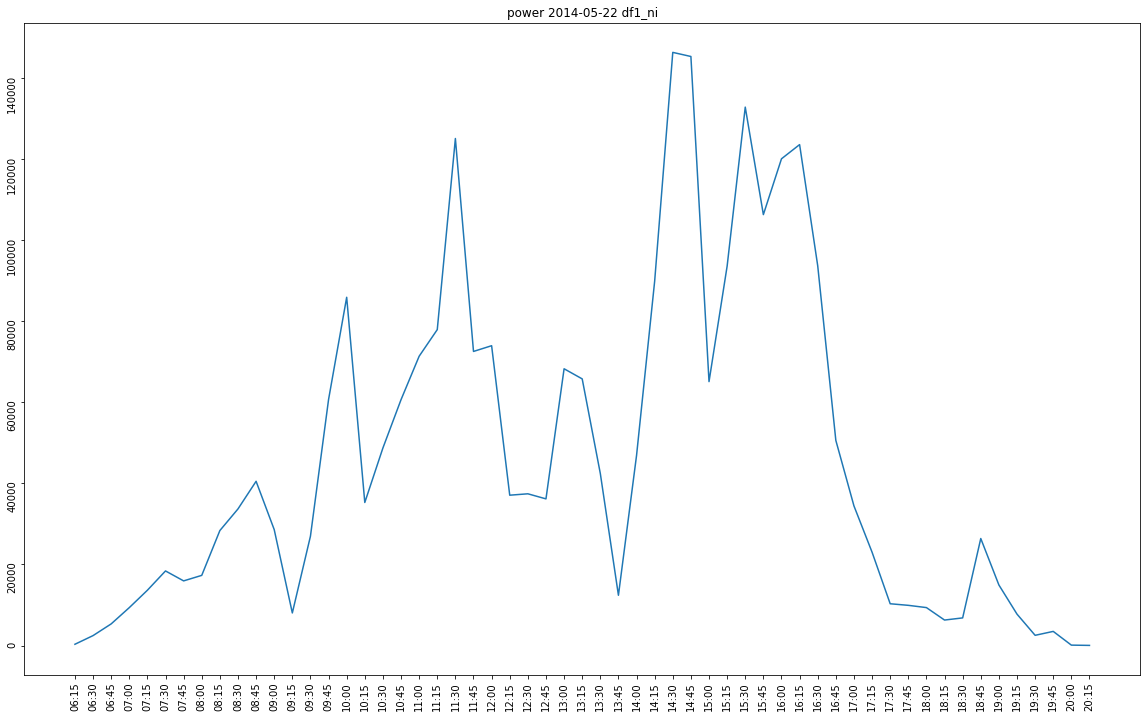

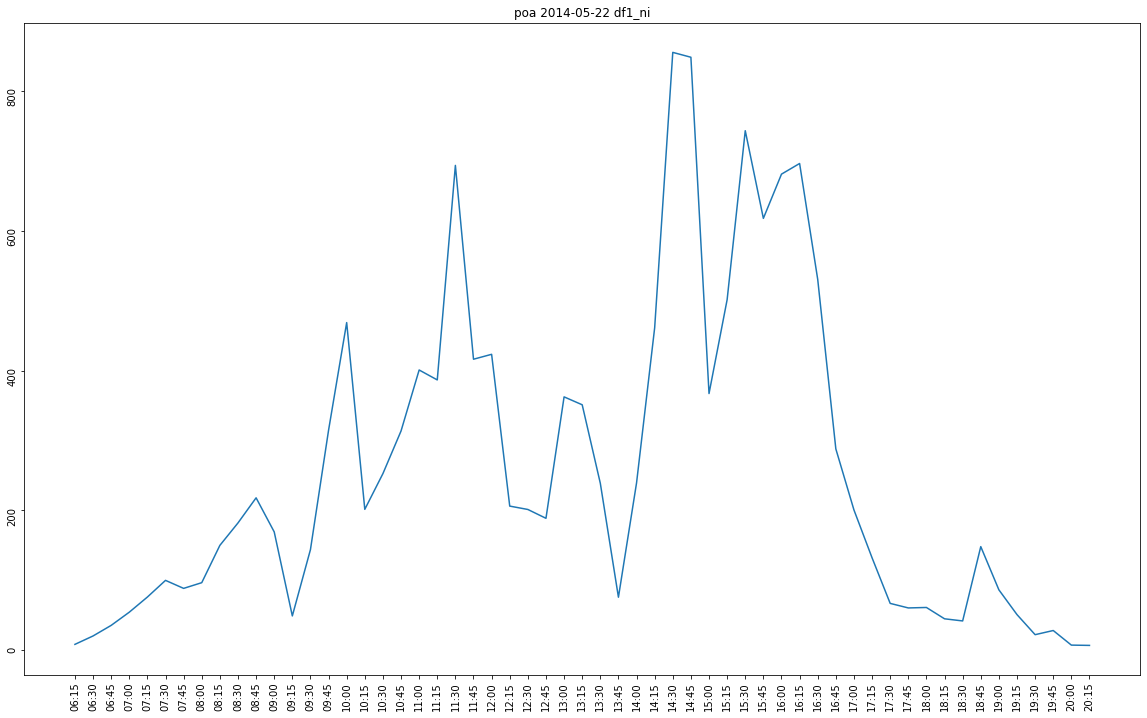

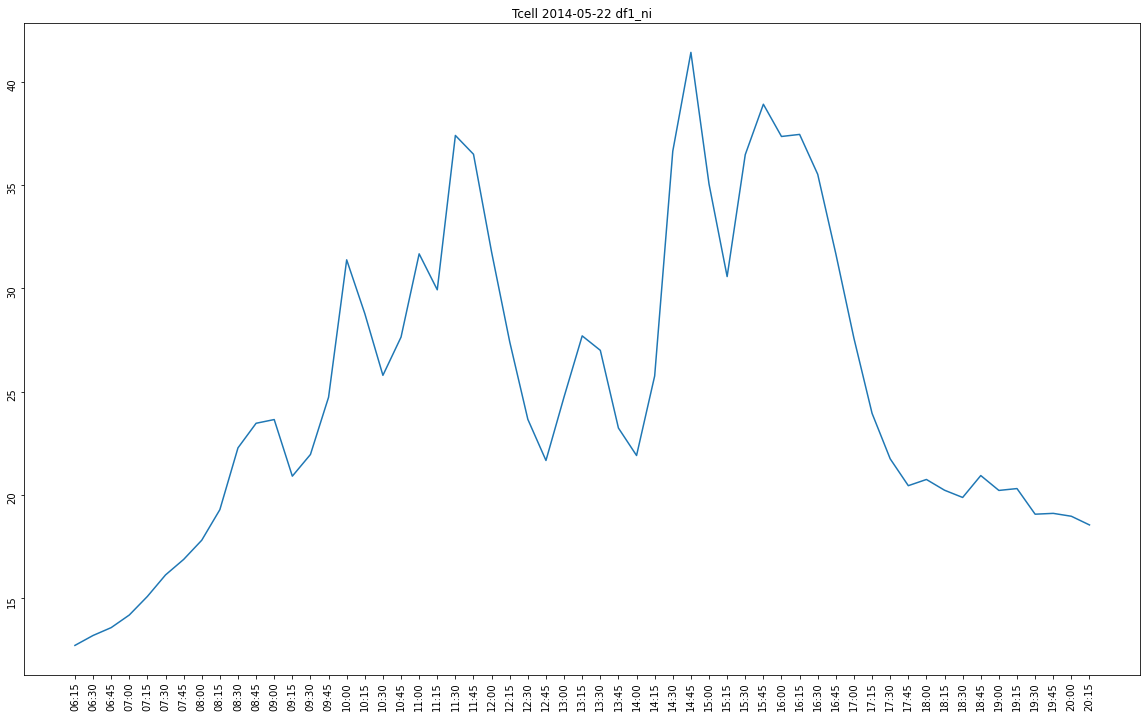

In [50]:
import numpy as np

def plotear_dia_todas_h(df, variable, dia, df_str):
    df_otro = pd.DataFrame()
    
    df_otro['Timestamp'] = pd.to_datetime(df.Timestamp)    
    df_otro["Dia"] = df_otro["Timestamp"].dt.strftime("%Y-%m-%d") 
    df_otro["Hora_min"] = df_otro["Timestamp"].dt.strftime("%H:%M")
    
    

    mask_dia = (df_otro.Dia == dia)
    variable_dia=df[variable].loc[mask_dia]
    time_dia=df_otro['Hora_min'].loc[mask_dia]
    
    #print(time_dia)
    
    #fig, ax = plt.subplots(figsize=(15,8))
    fig, ax = plt.subplots(figsize=(20,12))
    ax.plot(time_dia, variable_dia)
    

    #ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
    ax.tick_params(labelrotation=90)

    ax.title.set_text(variable + " " + dia + " " + df_str)
    
    nombre_img="plotear_dia_todas_h_" +  variable + "_" + dia + "_" + df_str + ".png"
    plt.savefig(path_ima + nombre_img)

#DIA RAFA: 2013-05-04


plotear_dia_todas_h(df1_ni, "power", '2014-05-22', 'df1_ni')
plotear_dia_todas_h(df1_ni, "poa", '2014-05-22', 'df1_ni')
plotear_dia_todas_h(df1_ni, "Tcell", '2014-05-22', 'df1_ni')

print(df1_ni)



"\nplotear_dia_norm(df2_ni, '2013-05-04', 'df2_ni')\nplotear_dia_norm(df3_ni, '2013-05-04', 'df3_ni')\nplotear_dia_norm(df4_ni, '2013-05-04', 'df4_ni')\n"

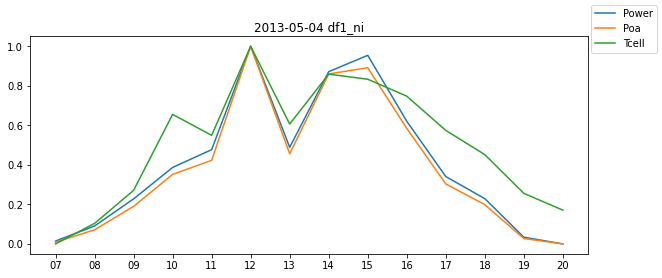

In [51]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

def plotear_dia_norm(df, dia, df_str):
    
    
    df_otro = pd.DataFrame()
    
    df_otro['Timestamp'] = pd.to_datetime(df.Timestamp)
    df_otro["Año"] = df_otro["Timestamp"].dt.strftime("%Y")
    df_otro["Dia"] = df_otro["Timestamp"].dt.strftime("%Y-%m-%d")
    df_otro["Hora"] = df_otro["Timestamp"].dt.strftime("%H")
    df_otro["Min_sec"] = df_otro["Timestamp"].dt.strftime("%M:%S")
    
    mask_dia = (df_otro.Dia == dia) & (df_otro.Min_sec == '00:00')
    #mask_dia = (df_otro.Dia == dia)
    
    
    scaler=MinMaxScaler()
    df_a_norm = df.loc[mask_dia] #df_a_norm = antes de normalizar
    df_a_norm=df_a_norm.drop("Timestamp", axis=1) #df_a_norm --> dejamos solo power, poa y Tcell

    norm_array=scaler.fit_transform(df_a_norm)
    df_d_norm=pd.DataFrame(norm_array, columns=df_a_norm.columns) #df_d_norm = despues de normalizar
    
    time_dia=df_otro['Hora'].loc[mask_dia]
    
    #print(time_dia)
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(time_dia, df_d_norm.iloc[:,0], label ="Power")
    ax.plot(time_dia, df_d_norm.iloc[:,1], label ="Poa")
    ax.plot(time_dia, df_d_norm.iloc[:,2], label ="Tcell")
    ax.title.set_text(dia + " " + df_str)
    fig.legend(loc = 'upper right')
    
    nombre_img="plotear_dia_norm_" + dia + "_" + df_str + ".png"
    plt.savefig(path_ima + nombre_img)
    
#EL DÍA QUE PROBÓ RAFA
plotear_dia_norm(df1_ni, '2013-05-04', 'df1_ni') 
'''
plotear_dia_norm(df2_ni, '2013-05-04', 'df2_ni')
plotear_dia_norm(df3_ni, '2013-05-04', 'df3_ni')
plotear_dia_norm(df4_ni, '2013-05-04', 'df4_ni')
'''


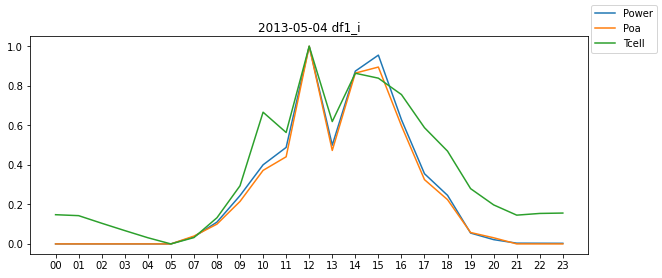

In [52]:
plotear_dia_norm(df1_i, '2013-05-04', 'df1_i')

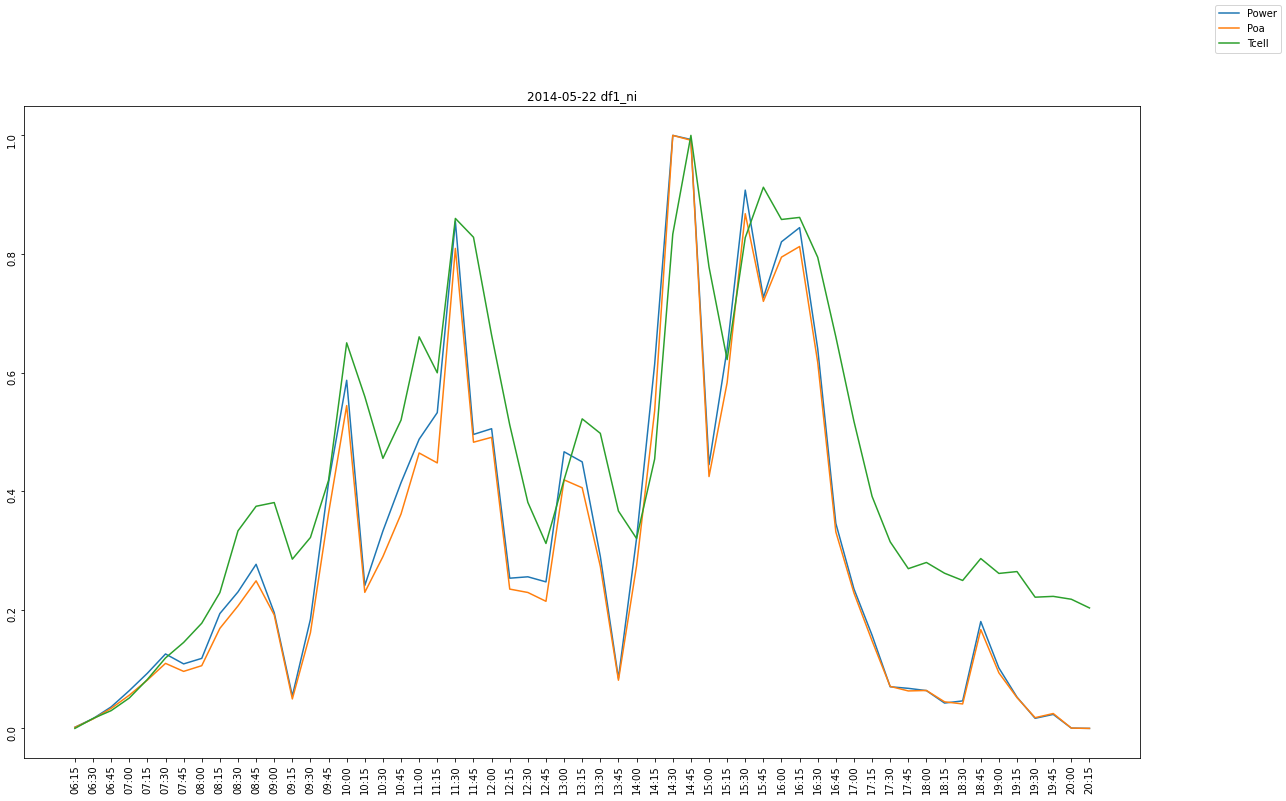

In [53]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

def plotear_dia_norm_todas_h(df, dia, df_str):
    
    
    df_otro = pd.DataFrame()
    
    df_otro['Timestamp'] = pd.to_datetime(df.Timestamp)    
    df_otro["Dia"] = df_otro["Timestamp"].dt.strftime("%Y-%m-%d") 
    df_otro["Hora_min"] = df_otro["Timestamp"].dt.strftime("%H:%M")
    
    mask_dia = (df_otro.Dia == dia)
    time_dia=df_otro['Hora_min'].loc[mask_dia]

    scaler=MinMaxScaler()
    df_a_norm = df.loc[mask_dia] #df_a_norm = antes de normalizar
    df_a_norm=df_a_norm.drop("Timestamp", axis=1) #df_a_norm --> dejamos solo power, poa y Tcell

    norm_array=scaler.fit_transform(df_a_norm)
    df_d_norm=pd.DataFrame(norm_array, columns=df_a_norm.columns) #df_d_norm = despues de normalizar    

    fig, ax = plt.subplots(figsize=(20,12))
    ax.plot(time_dia, df_d_norm.iloc[:,0], label ="Power")
    ax.plot(time_dia, df_d_norm.iloc[:,1], label ="Poa")
    ax.plot(time_dia, df_d_norm.iloc[:,2], label ="Tcell")
    ax.tick_params(labelrotation=90)
    ax.title.set_text(dia + " " + df_str)
    fig.legend(loc = 'upper right')
    
    nombre_img="plotear_dia_norm_todas_h_" + dia + "_" + df_str + ".png"
    plt.savefig(path_ima + nombre_img)
    
#2014-05-22
#plotear_dia_norm_todas_h(df1_ni, '2013-05-04', 'df1_ni') 
plotear_dia_norm_todas_h(df1_ni, '2014-05-22', 'df1_ni')

"\nplotear_dia_norm(df2_ni, '2013-05-04')\nplotear_dia_norm(df3_ni, '2013-05-04')\nplotear_dia_norm(df4_ni, '2013-05-04')\n"

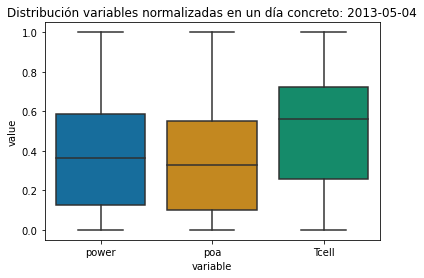

In [54]:
def plotear_dia_norm_boxplot(df, dia):
    
    
    df_otro = pd.DataFrame()
    
    df_otro['Timestamp'] = pd.to_datetime(df.Timestamp)
    df_otro["Dia"] = df_otro["Timestamp"].dt.strftime("%Y-%m-%d")
    df_otro["Hora"] = df_otro["Timestamp"].dt.strftime("%H")
    df_otro["Min_sec"] = df_otro["Timestamp"].dt.strftime("%M:%S")
    
    mask_dia = (df_otro.Dia == dia) & (df_otro.Min_sec == '00:00')
    #mask_dia = (df_otro.Dia == dia)
    
    scaler=MinMaxScaler()
    df_a_norm = df.loc[mask_dia] #df_a_norm = antes de normalizar
    df_a_norm=df_a_norm.drop("Timestamp", axis=1) #df_a_norm --> dejamos solo power, poa y Tcell

    norm_array=scaler.fit_transform(df_a_norm)
    df_d_norm=pd.DataFrame(norm_array, columns=df_a_norm.columns) #df_d_norm = despues de normalizar
    
    #print("df_d_norm", df_d_norm)
    
    time_dia=df_otro['Hora'].loc[mask_dia]
        
    #BOXPLOT
    sns.boxplot(x="variable", y="value", data=pd.melt(df_d_norm), palette="colorblind")
    plt.title("Distribución variables normalizadas en un día concreto: " + dia)
    
    nombre_img="plotear_dia_norm_boxplot_" + dia + ".png"
    plt.savefig(path_ima + nombre_img)
    
#EL DÍA QUE PROBÓ RAFA
plotear_dia_norm_boxplot(df1_ni, '2013-05-04') 
'''
plotear_dia_norm(df2_ni, '2013-05-04')
plotear_dia_norm(df3_ni, '2013-05-04')
plotear_dia_norm(df4_ni, '2013-05-04')
'''

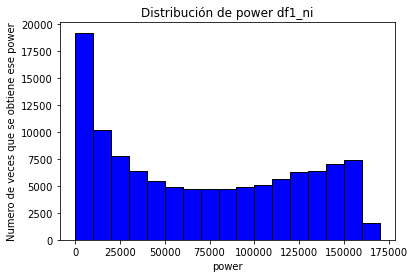

In [55]:

#--------------------------------------------------------

#Un detalle: al cargar los csv puede que te resulte cómo extraer el año y el mes como columnas separadas, 
#tanto si quieres agrupar (para la gráfica de potencia) o para posteriormente la regresión, 
#que mejora si tienes estas columnas (en cambio no las tengas en cuenta para las correlaciones o la estadística descriptiva)

#df['year'] = pd.DatetimeIndex(df['Timestamp']).year
#df['month'] = pd.DatetimeIndex(df['Timestamp']).month
#--------------------------------------------------------
#HISTOGRAMAS

#print(df1_ni.Tcell.hist(bins=20))
#min ni    -1870.000000(power)       0.010000(poa)      -4.910000(tcell)
#min i  -1870.000(power)           -0.01000000(poa)     -5.680000 (tcell)

#max ni    166160.000000(power)    999.990000(poa)      63.790000 (tcell)
#max      168160.0 (power)        999.9900 (poa)        65.31000 (tcell)

def histograma(df, variable, df_str):
    
    lista=[]
    #col=0 --> Timestamp
    
    if(variable == "power"):
        color='blue'
        lista= list(range(0,175000,10000))
        col=1
        
    if(variable == "poa"):
        color='green'
        #lista= list(range(0,1000,100))
        lista= list(range(0,1000,50))
        col=2
    
    if(variable == "Tcell"):
        color='red'
        lista= list(range(-10,70,5))
        col=3
    
    
    plt.hist(df.iloc[:,col], bins=lista, color=color, edgecolor='black')
    plt.xlabel(variable)
    plt.ylabel('Numero de veces que se obtiene ese ' + variable)
    plt.title('Distribución de ' + variable + ' ' + df_str)
    
    nombre_img="histograma_" + variable + "_" + df_str +  ".png"
    plt.savefig(path_ima + nombre_img)
    
    

histograma(df1_ni, "power", "df1_ni")

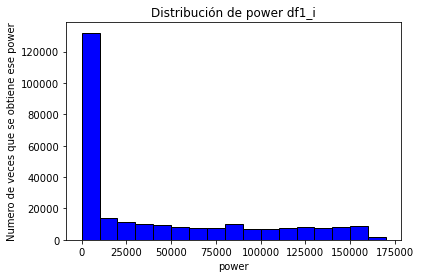

In [56]:
histograma(df1_i, "power", "df1_i")

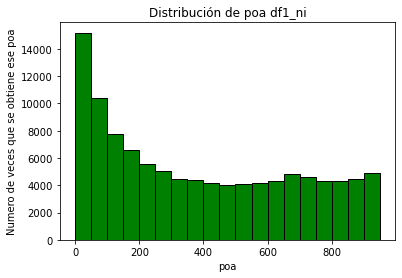

In [57]:
histograma(df1_ni, "poa", "df1_ni")

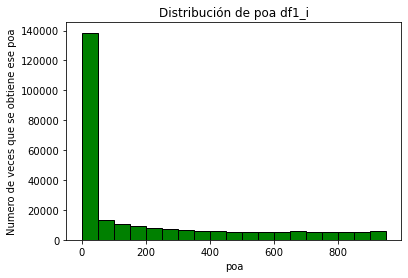

In [58]:
histograma(df1_i, "poa", "df1_i")

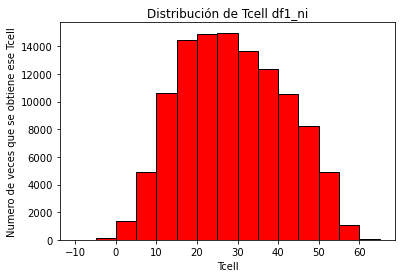

In [59]:
histograma(df1_ni, "Tcell", "df1_ni")

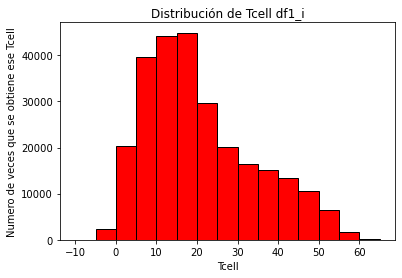

In [60]:
histograma(df1_i, "Tcell", "df1_i")

Timestamp    2020-12-31 16:45:00
power                    518.754
poa                        16.39
Tcell                      10.15
Año                         2020
Name: 112178, dtype: object


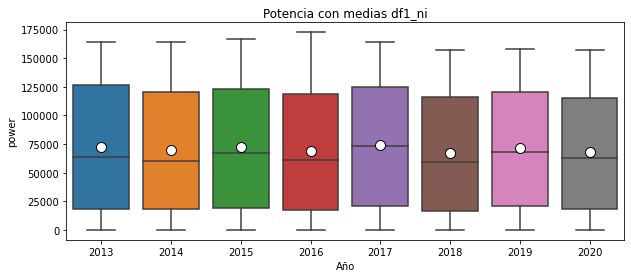

In [61]:
#--------------------------------------------------------
#BOXPLOT

#Gráficas de más tipos y más bonitas puedes utilizar la librería seaborn --> boxplots
#https://cmdlinetips.com/2018/03/how-to-make-boxplots-in-python-with-pandas-and-seaborn/

#boxplot muestra dispersión y simetria
#3 Cuartiles: Q1, Q2 y Q3, máximo y minimo
#Nos informa de valores atípicos: outliers
#Nos muestra la simetria de la distribución
#Está compuesto por un rectangulo (la caja) y por 2 brazos (2 bigotes)
#Min-Q1-Q2(Mediana)-Q3-Max
#Min y max son los 2 bigotes.
#La mediana refleja mejor la distribución de los datos. Ya que la media puede ser alterada por ún valor atípico. 

#Valores atípicos leves/extremos
#Rango Intercuatilico(RI)=Q3-Q1

#Valores atípicos leves
#Min=Q1-1.5*RI
#Max=Q1+1.5*RI

#Valores atípicos extremos
#Min=Q1-3*RI
#Max=Q1+3*RI

#https://levelup.gitconnected.com/data-visualization-with-pandas-and-seaborn-5de444b567a0




def boxplot_años(df, variable, df_str):
    df_otro = df
    
    df_otro['Timestamp'] = pd.to_datetime(df.Timestamp)
    df_otro["Año"] = df_otro["Timestamp"].dt.strftime("%Y")
    
    plt.figure(figsize=(10,4))
    sns.boxplot(x="Año",y="power",data=df_otro,showmeans=True,meanprops={"marker":"o","markerfacecolor":"white","markeredgecolor":"black","markersize":"10"})
    #Boxplot de potencia por año con medias (círculo blanco)
    plt.title("Potencia con medias " + df_str)
    
    nombre_img="boxplot_años_" + variable + "_" + df_str + ".png"
    plt.savefig(path_ima + nombre_img)


    
boxplot_años(df1_ni, "power", "df1_ni")
print(df1_ni.iloc[-1])

Timestamp    2020-12-31 23:45:00
power                    518.754
poa                            0
Tcell                       3.16
Año                         2020
Name: 264455, dtype: object


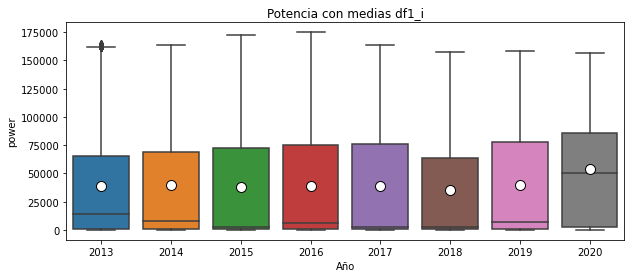

In [62]:
boxplot_años(df1_i, "power", "df1_i")
print(df1_i.iloc[-1])

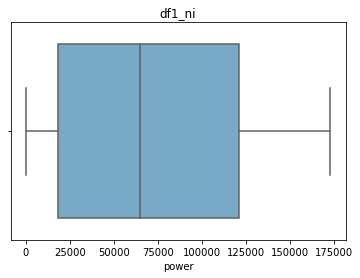

In [63]:
def boxplot_var(df, variable, df_str):
    if(variable == "power"):
        color='Blues'
    if(variable == "poa"):
        color='Greens'
    if(variable == "Tcell"):
        color='Reds'
    sns.boxplot(x =df[variable], palette=color)
    plt.title(df_str)
    
    nombre_img="boxplot_var_" + variable + "_" + df_str + ".png"
    plt.savefig(path_ima + nombre_img)

boxplot_var(df1_ni, "power", 'df1_ni')

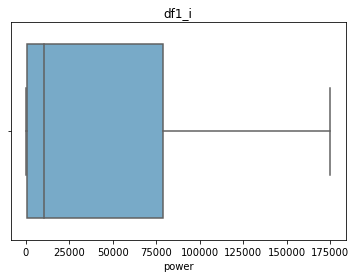

In [64]:
boxplot_var(df1_i, "power", 'df1_i')

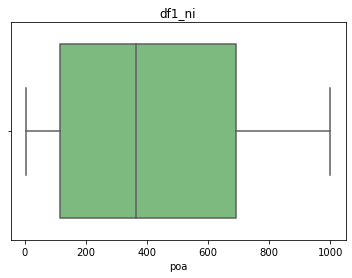

In [65]:
boxplot_var(df1_ni, "poa", 'df1_ni')

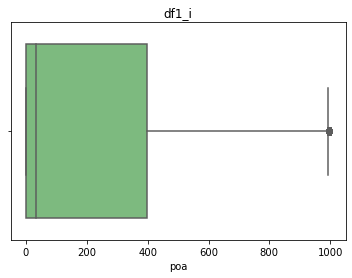

In [66]:
boxplot_var(df1_i, "poa", 'df1_i')

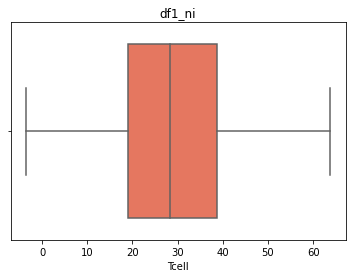

In [67]:
boxplot_var(df1_ni, "Tcell", 'df1_ni')

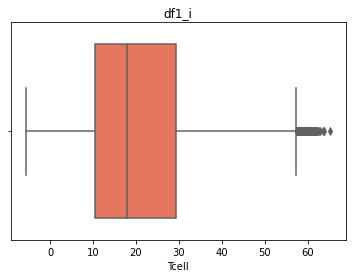

In [68]:
boxplot_var(df1_i, "Tcell", 'df1_i')

In [69]:
print("CORRELACIÓN INTERPOLADOS\n")
print("df1_i \n", df1_i.corr())
print("------------------------------------")
print("df2_i \n", df2_i.corr())
print("------------------------------------")
print("df3_i \n", df3_i.corr())
print("------------------------------------")
print("df4_i \n", df4_i.corr())

CORRELACIÓN INTERPOLADOS

df1_i 
           power       poa     Tcell
power  1.000000  0.924008  0.798623
poa    0.924008  1.000000  0.866971
Tcell  0.798623  0.866971  1.000000
------------------------------------
df2_i 
           power       poa     Tcell
power  1.000000  0.963565  0.830994
poa    0.963565  1.000000  0.866769
Tcell  0.830994  0.866769  1.000000
------------------------------------
df3_i 
           power       poa     Tcell
power  1.000000  0.971854  0.839145
poa    0.971854  1.000000  0.867111
Tcell  0.839145  0.867111  1.000000
------------------------------------
df4_i 
           power       poa     Tcell
power  1.000000  0.976994  0.839004
poa    0.976994  1.000000  0.867098
Tcell  0.839004  0.867098  1.000000


In [70]:
#Mostrar las correlaciones de forma gráfica con un heatmap, con seaborn
#https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
#CORRELACIÓN

print("CORRELACIÓN NO INTERPOLADOS\n")
print("df1_ni \n", df1_ni.corr())
print("------------------------------------")
print("df2_ni \n", df2_ni.corr())
print("------------------------------------")
print("df3_ni \n", df3_ni.corr())
print("------------------------------------")
print("df4_ni \n", df4_ni.corr())

CORRELACIÓN NO INTERPOLADOS

df1_ni 
           power       poa     Tcell
power  1.000000  0.991012  0.797953
poa    0.991012  1.000000  0.829644
Tcell  0.797953  0.829644  1.000000
------------------------------------
df2_ni 
           power       poa     Tcell
power  1.000000  0.989487  0.809163
poa    0.989487  1.000000  0.834032
Tcell  0.809163  0.834032  1.000000
------------------------------------
df3_ni 
           power       poa     Tcell
power  1.000000  0.989372  0.804261
poa    0.989372  1.000000  0.833197
Tcell  0.804261  0.833197  1.000000
------------------------------------
df4_ni 
           power       poa     Tcell
power  1.000000  0.988035  0.801035
poa    0.988035  1.000000  0.832755
Tcell  0.801035  0.832755  1.000000


In [71]:
def diferencias_correlaciones(df_i, df_ni, df_str):
    
    print("------------------------ "+ df_str+ " ------------------------------------")
    print("Diferencia correlación entre interpolados y no interpolados: ")
    variab=["power", "poa", "Tcell"]
    diferencias_df=[]
    for i in range(3):
        
        if i == 2:
            var1=variab[i]
            var2=variab[0]
        else:
        
            var1=variab[i]
            var2=variab[i+1]
        
        df_corr_i=df_i[[var1,var2]].corr()
        df_corr_ni=df_ni[[var1,var2]].corr()

        corr_i=df_corr_i.iloc[0,1]
        corr_ni=df_corr_ni.iloc[0,1]

        var1_var2_corr_i_ni= abs(corr_i - corr_ni)
        
        diferencias_df.append(var1_var2_corr_i_ni)
        print()
        print(var1 + "-" + var2)
        #print(var1_var2_corr_i_ni)
        print("{:.6f}".format(var1_var2_corr_i_ni))
        print()
    print("-------------------------------------------------------------")
    
    return diferencias_df

dif_df1=diferencias_correlaciones(df1_i, df1_ni,"df1")
dif_df2=diferencias_correlaciones(df2_i, df2_ni,"df2")
dif_df3=diferencias_correlaciones(df3_i, df3_ni,"df3")
dif_df4=diferencias_correlaciones(df4_i, df4_ni,"df4")

media_dif_pow_poa=(dif_df1[0]+dif_df2[0]+dif_df3[0]+dif_df4[0])/4
media_dif_poa_tcell=(dif_df1[1]+dif_df2[1]+dif_df3[1]+dif_df4[1])/4
media_dif_tcell_pow=(dif_df1[2]+dif_df2[2]+dif_df3[2]+dif_df4[2])/4

print("media_dif_pow_poa")
print("{:.6f}".format(media_dif_pow_poa))
print()

print("media_dif_poa_tcell")
print("{:.6f}".format(media_dif_poa_tcell))
print()

print("media_dif_tcell_pow")
print("{:.6f}".format(media_dif_tcell_pow))
print()



------------------------ df1 ------------------------------------
Diferencia correlación entre interpolados y no interpolados: 

power-poa
0.067003


poa-Tcell
0.037327


Tcell-power
0.000670

-------------------------------------------------------------
------------------------ df2 ------------------------------------
Diferencia correlación entre interpolados y no interpolados: 

power-poa
0.025922


poa-Tcell
0.032737


Tcell-power
0.021831

-------------------------------------------------------------
------------------------ df3 ------------------------------------
Diferencia correlación entre interpolados y no interpolados: 

power-poa
0.017518


poa-Tcell
0.033914


Tcell-power
0.034884

-------------------------------------------------------------
------------------------ df4 ------------------------------------
Diferencia correlación entre interpolados y no interpolados: 

power-poa
0.011040


poa-Tcell
0.034343


Tcell-power
0.037969

------------------------------------------

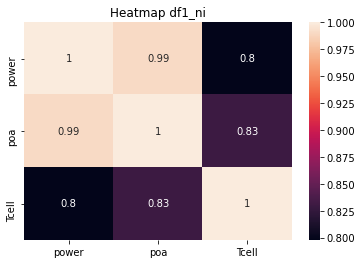

In [72]:
def mapa_calor(df, df_str):
    heatmap=sns.heatmap(df.corr(), annot=True)
    heatmap.set_title('Heatmap ' + df_str)
    
    nombre_img="mapa_calor_" + df_str + ".png"
    plt.savefig(path_ima + nombre_img)
    #heatmap.savefig(path_ima + nombre_img)
    
mapa_calor(df1_ni, "df1_ni")
#mapa_calor(df2_ni, "df2_ni")
#mapa_calor(df3_ni, "df3_ni")
#mapa_calor(df4_ni, "df4_ni")
